In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y)
pca = PCA(n_components=154)
X_pca = pca.fit_transform(X_train) 
X_recovered = pca.inverse_transform(X_pca)

Text(0.5, 1.0, 'Recovered data from PCA with reconstruction error')

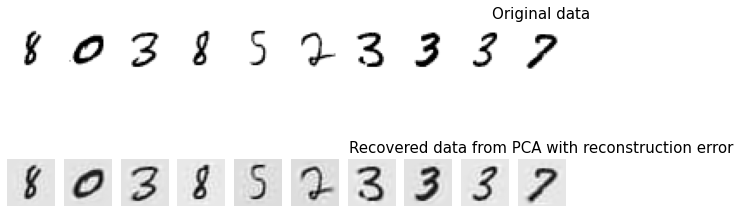

In [95]:
# Original Images before PCA
import matplotlib as mpl
from sklearn.decomposition import PCA

n=10
fig,ax=plt.subplots(ncols=n,nrows=2,figsize=(10,4.5),sharey=True)
def plot_digit (data,i):
  for index,img in enumerate(data):
    plt.sca(ax[i,index])
    image = img.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary)
    plt.axis("off")
    
plot_digit(X_train[:n,:],0)
plt.title("Original data",fontsize=15)
plot_digit(X_recovered[:n,:],1)
plt.title("Recovered data from PCA with reconstruction error",fontsize=15)

# Randomized PCA
rnd_pca = PCA (n_components=154, svd_solver="randomized")
x_reduced = rnd_pca.fit_transform(X_train)

# Incremental PCA
from sklearn.decomposition import IncrementalPCA
n_batch = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batch):
  inc_pca.partial_fit(X_batch)
x_reduced = inc_pca.transform(X_train)


In [ ]:
# Incremental PCA using memmap
